# Programming in MatLab

Friday, July 6, 2018

In [1]:
clear, format short, format compact

* (4.2-10) Circle packing problem
* (10.1-10) Gaussian elimination without pivoting
* (5.8-5) Two-term iteration

## 1. Circle packing problem

This is Problem 4.2-10. Recall that we wanted to inscribe three circles touching one another inside the circle of radius $r_{\rm out} = 2$ centered at the origin. By symmetry, the three smaller circle have the same radii $r_{\rm in}$ and the angle between any two line segments connecting the centers to the origin is $\phi = 2\pi/3$.

So it suffices to consider any one of the three triangles connecting the origin and two of the centers. It is an obtuse isoscles triangle two of whose sides have length $r_{\rm out} - r_{\rm in}$ and the other length $2 r_{\rm in}$. By [the law of cosines](https://en.wikipedia.org/wiki/Law_of_cosines), we find that
$$
r_{\rm in} = r_{\rm out} \frac{ \sqrt{2(1-\cos \phi)} }{ 2 + \sqrt{2 (1-\cos \phi)} }.
$$

With this, we can write a code plotting the desired figure. 

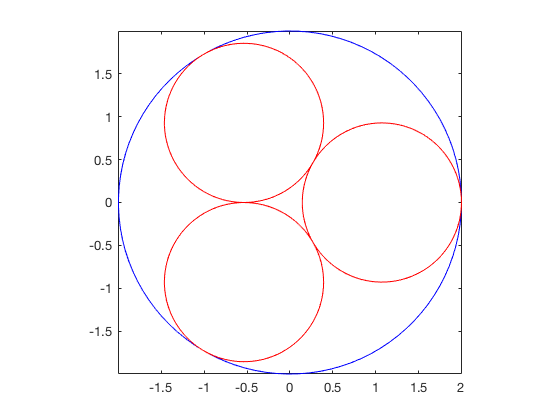

In [1]:
%% parameters
r_out = 2;
phi = 2*pi/3;  % inner angle

%% formula for r_in derived above using the law of cosines
r_in = r_out*sqrt(2*(1-cos(phi)))/(2+sqrt(2*(1-cos(phi))));

%% centers of inner circle as a COLUMN vector
angles = 2*pi*(0:2)'/3;
centers = (r_out-r_in)*exp(1i*angles);

%% sample points on inner and outer circles
theta = linspace(0, 2*pi, 100);
z_unit = exp(1i*theta);
z_out = r_out*z_unit;
Z = centers + r_in*z_unit;

% plotting
hold off;
plot(real(z_out), imag(z_out), 'b');
hold on;
plot(real(Z(1,:)), imag(Z(1,:)), 'r');
plot(real(Z(2,:)), imag(Z(2,:)), 'r');
plot(real(Z(3,:)), imag(Z(3,:)), 'r');
axis image

**Exercise 1.** Modify the previous code so that it generates the figure with $n \ge 3$ circles inscribed within a single circle. Produce figures for $r_{\rm out} = 3$ and $n = 4, 5, 10, 20$. 

## 2. Gaussian elimination with no pivoting

This is Problem 10.1-9. We will write a function which calculates the Gaussian elimination of $A\mathbf{x} = \mathbf{b}$ without pivoting. The inputs are $A$ and $\mathbf{b}$ and the output is $\mathbf{x}$. 

* Verify the code using `norm` instead of looking at individual elements.
* Write two versions of the code using different methods for updating the rows in Gaussian elimination: suppose you are zeroing out elements in the $j$th column below the diagonal and you are working on the $i$th row. 
    (1) zero out $a_{i,j}$ using the entire row;
    (2) zero it out using only $a_{i,j}, a_{i, j+1}, \ldots, a_{i,n}$.
  Solve a linear system for large $n$ using the two functions and see which one runs faster. Use the more efficient one for the rest. 
* Keep in mind that Gaussian elimination includes the calculation of $\mathbf{x}$ using backward substitution. 

In [2]:
%% This is a simple system that will get us started
A = [2 2 1;
    -4 6 1;
    5 -5 3]
b = [6 -8 4]'
A_orig = A;

A =
     2     2     1
    -4     6     1
     5    -5     3
b =
     6
    -8
     4


In [3]:
%% Step 1: row operations
Ab = [A b];   % augmented matrix
% column 1
Ab(2,:) = Ab(2,:) - Ab(2,1)/Ab(1,1)*Ab(1,:);
Ab(3,:) = Ab(3,:) - Ab(3,1)/Ab(1,1)*Ab(1,:);
% column 2
Ab(3,:) = Ab(3,:) - Ab(3,2)/Ab(2,2)*Ab(2,:);
U = Ab(:,1:end-1)
beta = Ab(:,end)

%% Step 2: solving U*x = beta by backward substitution
x = zeros(3,1);
x(3) = beta(3)/U(3,3);
x(2) = (beta(2) - U(2,3)*x(3))/U(2,2);
x(1) = (beta(1) - U(1,2)*x(2) - U(1,3)*x(3))/U(1,1);

%% Check using norm:
residual = A*x - b;
norm(residual)

U =
   2.000000000000000   2.000000000000000   1.000000000000000
                   0  10.000000000000000   3.000000000000000
                   0                   0   3.500000000000000
beta =
     6
     4
    -7
ans =
     0


**Exercise 2.** Modify the previous script by identifying some parameters and using vectorization or loop structure wherever is appropriate. Then write it into a function m-file, `GEnp.m` which begins with
```
function x = GEnp(A, b)
...
```

In [4]:
%% parameters and preallocation
n = size(A,1);
x = zeros(n,1);

%% Step 1: row operations
Ab = [A b];   % augmented matrix
for j = 1:n-1
    for i = j+1:n
        Ab(i,:) = Ab(i,:) - Ab(i,j)/Ab(j,j)*Ab(j,:);
    end
end
U = Ab(:,1:end-1)
beta = Ab(:,end)

%% Step 2: solving U*x = beta by backward substitution
x(n) = beta(n)/U(n,n);
for j = n-1:-1:1
    x(j) = (beta(j) - U(j,j+1:n)*x(j+1:n))/U(j,j);
end

%% Check using norm:
residual = A*x - b;
norm(residual)

U =
   2.000000000000000   2.000000000000000   1.000000000000000
                   0  10.000000000000000   3.000000000000000
                   0                   0   3.500000000000000
beta =
     6
     4
    -7
ans =
     0


Now let's turn this script into a function.

(**Do not copy the first line ``%%file GEnp.m``.**)

In [5]:
%%file GEnp.m

function x = GEnp(A, b)

n = size(A,1);
x = zeros(n,1);

%% Step 1: row operations
Ab = [A b];   % augmented matrix
for j = 1:n-1
    for i = j+1:n
        Ab(i,:) = Ab(i,:) - Ab(i,j)/Ab(j,j)*Ab(j,:);
    end
end
U = Ab(:,1:end-1);
beta = Ab(:,end);

%% Step 2: solving U*x = beta by backward substitution
x(n) = beta(n)/U(n,n);
for j = n-1:-1:1
    x(j) = (beta(j) - U(j,j+1:n)*x(j+1:n))/U(j,j);
end

end

Created file '/Users/tae/Dropbox/Su18-Math3607/labs/GEnp.m'.


In [6]:
x  = GEnp(A, b);
norm(A*x - b)

ans =
     0


Following the suggestion, we write a second function which updates rows differently.

In [7]:
%%file GEnp1.m

function x = GEnp1(A, b)

n = size(A,1);
x = zeros(n,1);

%% Step 1: row operations
Ab = [A b];   % augmented matrix
for j = 1:n-1
    for i = j+1:n
        Ab(i,j:end) = Ab(i,j:end) - Ab(i,j)/Ab(j,j)*Ab(j,j:end);
    end
end
U = Ab(:,1:end-1);
beta = Ab(:,end);

%% Step 2: solving U*x = beta by backward substitution
x(n) = beta(n)/U(n,n);
for j = n-1:-1:1
    x(j) = (beta(j) - U(j,j+1:n)*x(j+1:n))/U(j,j);
end

end

Created file '/Users/tae/Dropbox/Su18-Math3607/labs/GEnp1.m'.


In [8]:
x = GEnp1(A, b);
norm(A*x - b)

ans =
     0


Here comes timing.

In [9]:
n = 800;
A = rand(n);
b = rand(n,1);
tic, x = GEnp(A, b); time1 = toc()
tic, x = GEnp1(A, b); time2 = toc()

time1 =
   1.856447017000000
time2 =
   4.456118036000000


## 3. Two-term iteration

This is Problem 5.8-5. We have three two-term iteration formulas:

In [10]:
iter_formula1 = @(a) 4./(5-a);
iter_formula2 = @(a) a - 0.1*sin(2*pi*a);
iter_formula3 = @(a) a - 0.5*sin(2*pi*a);

The fixed point $a$ for the first equation
$$
a_{n+1} = \frac{4}{5-a}
$$
is calculated by solving the quadratic equation obtained by replacing $a_{n}$ and $a_{n+1}$ by $a$:
$$
a^2 - 5a + 4 = 0,
$$
whose two roots are $a = 1$ and $a = 4$. 

**Exercise 4.** Write a script which calculates successively $a_1, a_2, \ldots, a_20$ given $a_0$. What would be a good way to present the sequence graphically?

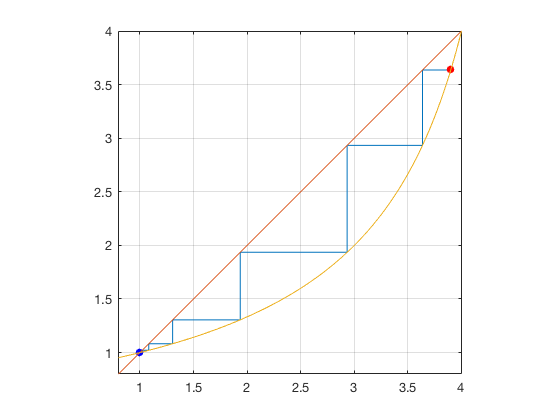

In [11]:
a = 3.9;
itermax = 30;
iter_formula = iter_formula1;
x = linspace(0.8, 4, 100);


aa = zeros(2*itermax, 2);
for j = 1:itermax
    anew = iter_formula(a);
    aa(2*j-1,:) = [a, anew];
    aa(2*j, :) = [anew, anew];
    a = anew;
end
hold off

plot(aa(:,1), aa(:,2))
hold on
plot(aa(1,1), aa(1,2), 'r.', 'markersize', 20)   % initial iterate
plot(aa(end,1), aa(end,2), 'b.', 'markersize', 20)  % terminal iterate
plot(x, x)
plot(x, iter_formula(x))
axis image
grid on
